In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
attrs = ["letter", "x-box", "y-box", "width", "high", "onpix", "x-bar",
         "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege",
         "xegvy", "y-ege", "yegvx"]
df = pd.read_csv('data/letter-recognition.data', names = attrs)

In [3]:
df.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
df['letter'].describe()

count     20000
unique       26
top           U
freq        813
Name: letter, dtype: object

In [5]:
df['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
Q    783
N    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
Z    734
H    734
Name: letter, dtype: int64

In [6]:
# data split
X, Y = df.iloc[:, 1:], df.iloc[:, 0]
X = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, 
                                                    stratify = Y, shuffle = True, random_state = 8)

# KNN

In [7]:
K_knn = np.arange(1, 57, 2)
K_knn

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55])

In [8]:
%%time
pipe = Pipeline([('knn', KNeighborsClassifier())])

search_space = [{'knn': [KNeighborsClassifier()],
                 'knn__weights': ['uniform', 'distance'],
                 'knn__n_neighbors': K_knn}
                ]

search = GridSearchCV(pipe, search_space, cv = StratifiedKFold(n_splits=5), 
                   scoring = ['accuracy'], refit=False,
                   verbose = 0, n_jobs = -1)


best_knn = search.fit(X_train, Y_train)

Wall time: 56.1 s


In [9]:
best_knn.cv_results_['params'][np.argmin(best_knn.cv_results_['rank_test_accuracy'])]

{'knn': KNeighborsClassifier(),
 'knn__n_neighbors': 3,
 'knn__weights': 'distance'}

In [10]:
knn = KNeighborsClassifier(weights = best_knn.cv_results_['params'][np.argmin(best_knn.cv_results_['rank_test_accuracy'])].get('knn__weights'),
                               n_neighbors = best_knn.cv_results_['params'][np.argmin(best_knn.cv_results_['rank_test_accuracy'])].get('knn__n_neighbors')
                              )
    
knn.fit(X_train, Y_train)
    
train_acc = accuracy_score(Y_train, knn.predict(X_train))
test_acc = accuracy_score(Y_test, knn.predict(X_test))

train_acc, test_acc

(1.0, 0.954)

In [11]:
Y_test.shape, knn.predict(X_test).shape

((4000,), (4000,))

Text(0.5, 1.0, 'Confusion Matrix')

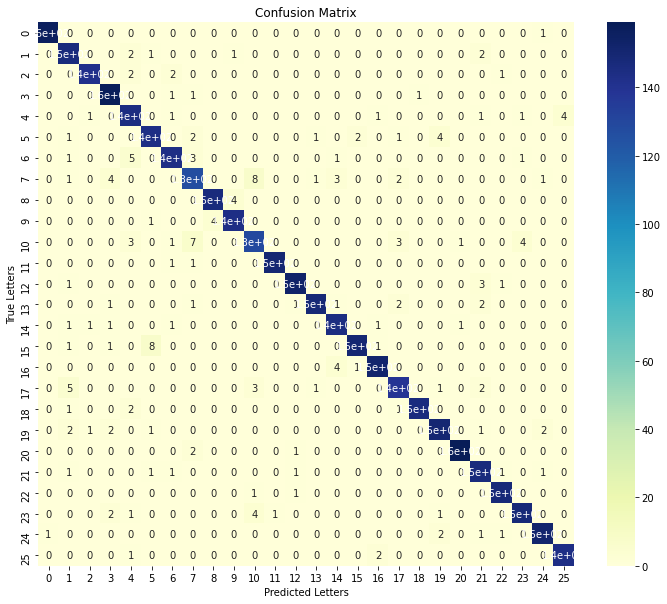

In [19]:
con_mat = confusion_matrix(Y_test, knn.predict(X_test));

f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(con_mat, annot=True, cmap="YlGnBu")
ax.set_xlabel('Predicted Letters')
ax.set_ylabel('True Letters')
ax.set_title('Confusion Matrix')

In [ ]:
con_mat

In [17]:
Y_test.value_counts()

U    162
P    161
D    161
T    159
M    158
A    158
X    157
N    157
Q    157
Y    157
G    155
F    155
E    154
B    153
V    153
L    152
O    151
R    151
I    151
S    150
W    150
J    149
K    148
Z    147
H    147
C    147
Name: letter, dtype: int64